# 1.importing the libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

#2.Loading the dataset and understanding it

In [2]:
#importing the dataset into pandas dataframe
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#dropping the customer_id column as it is not required for modelling
df=df.drop(columns=['customerID'])

In [8]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
#Printing the unique values in the columns so that we can understand the categorical,numerical columns
for col in df.columns:
  print(col,df[col].unique())
  print('-'*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [10]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [11]:
#filtering the data where the totalcharges =" "
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
#checking the length
len(df[df['TotalCharges']==" "])

11

In [13]:
#the total charges column is  balnk because the tenure is 0 for these so the customer has not completed atlast one month therefore it is 0
#instaed of dropping these rows we will replace it with string "0.0" because rest other are in string format which will then convert it in float format
df['TotalCharges']=df['TotalCharges'].replace(" ","0.0")

In [14]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
#checking the class distribution of the target column(Churn)
df['Churn'].value_counts()
# as we can see the difference betwen both is too much therfore there is a clear imbalance between both

,count
Churn,
No,5174
Yes,1869


#Insights
1.Customerid was removed as it was not required for modelling

2.No missing values in the dataset

3.replaced the missing value in totalcharges column with 0

4.converted the datatype of totalcharges from object to float

5.class imbalanced identified in target column

In [17]:
df.shape

(7043, 20)

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)

    plt.title(f"Histogram of {column_name}")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    plt.axvline(col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(col_median, color='green', linestyle='-', label='Median')

    plt.legend()
    plt.show()


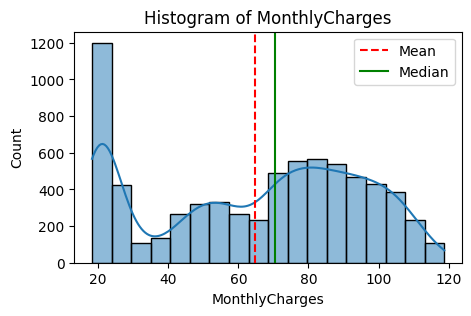

In [20]:
plot_histogram(df,'MonthlyCharges')

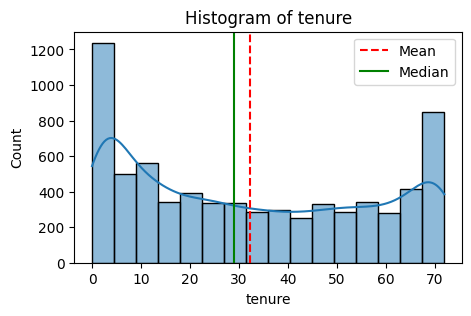

In [21]:
plot_histogram(df,'tenure')

In [22]:
def box_plot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.ylabel(column_name)
  plt.legend()
  plt.show()

/tmp/ipython-input-3525660228.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


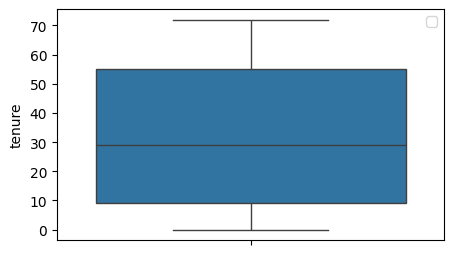

In [23]:
box_plot(df,"tenure")

/tmp/ipython-input-3525660228.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


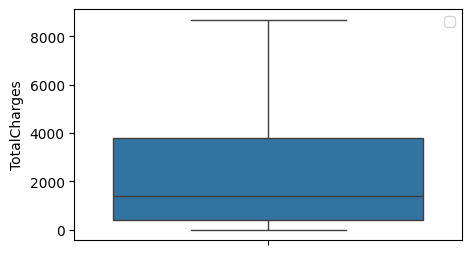

In [24]:
box_plot(df,"TotalCharges")

/tmp/ipython-input-3525660228.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


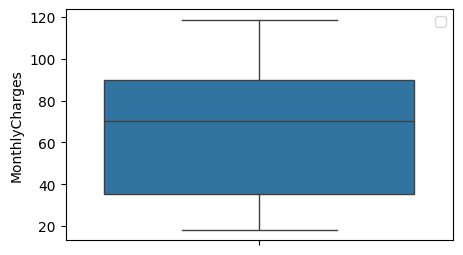

In [25]:
box_plot(df,"MonthlyCharges")

<Axes: >

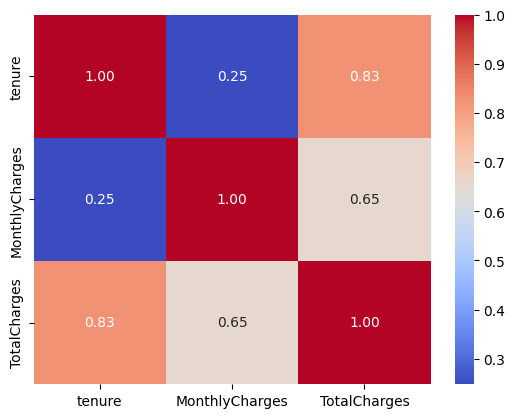

In [26]:
#correlation matrix - Heatmap
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")

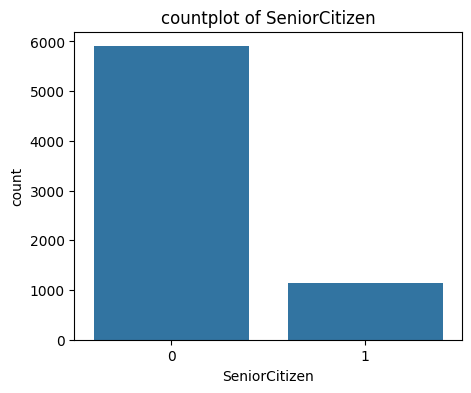

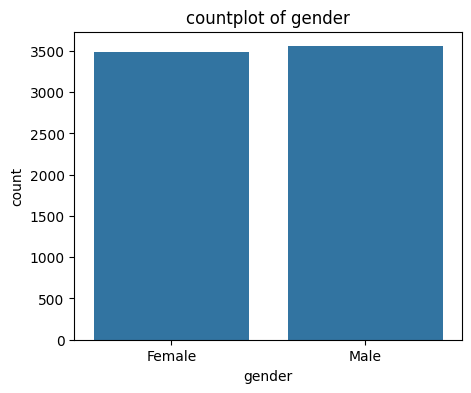

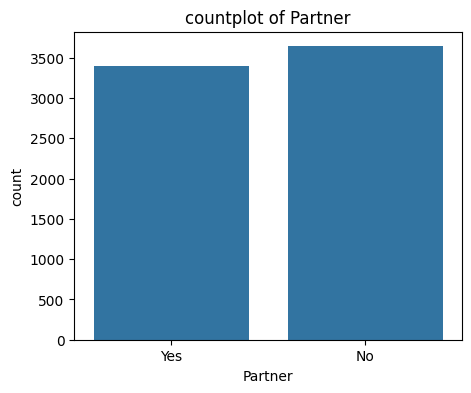

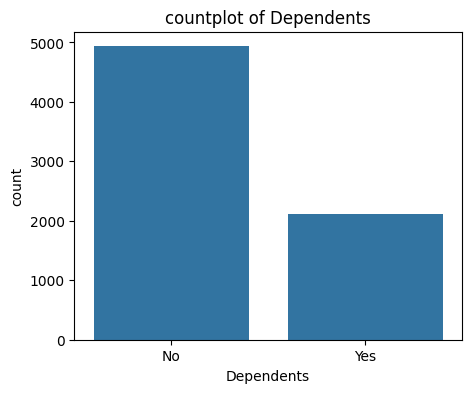

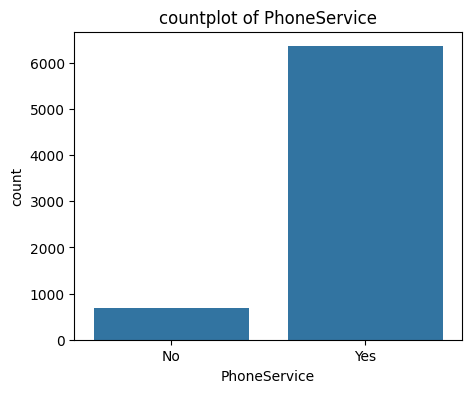

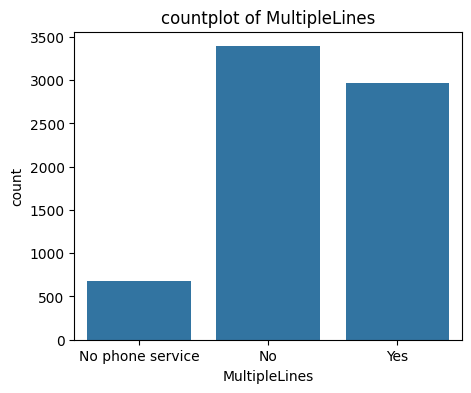

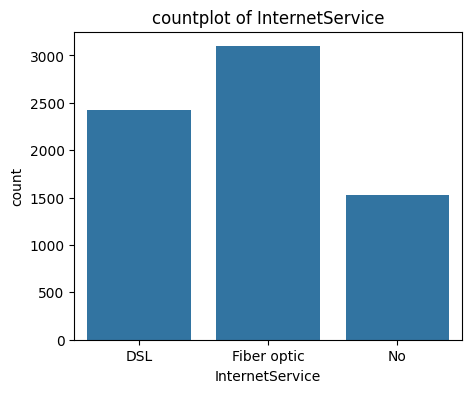

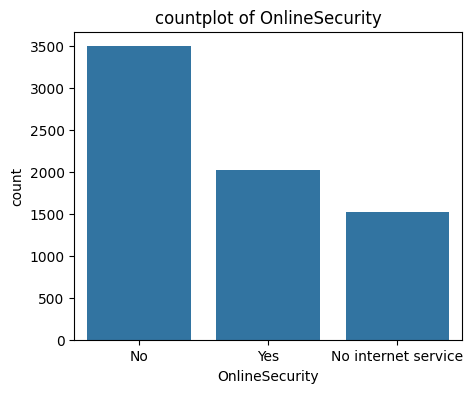

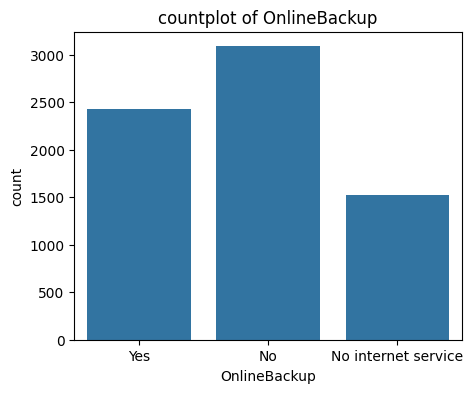

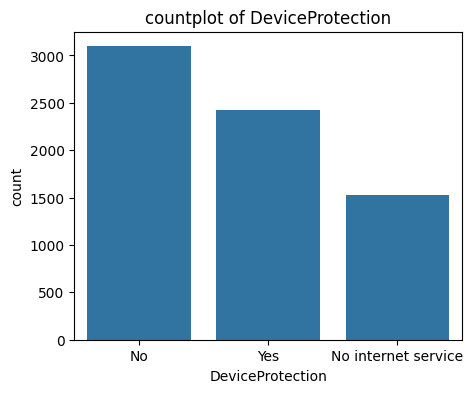

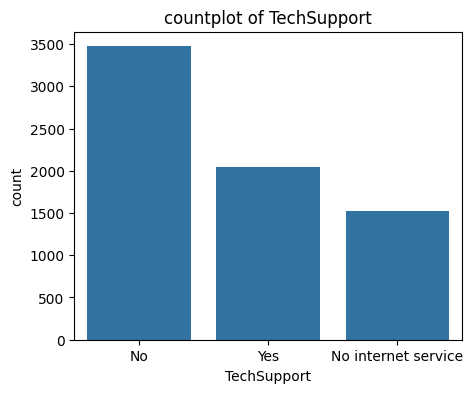

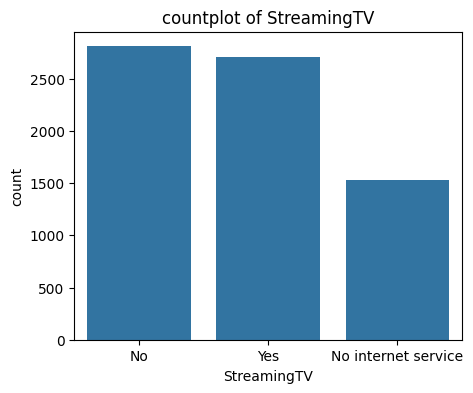

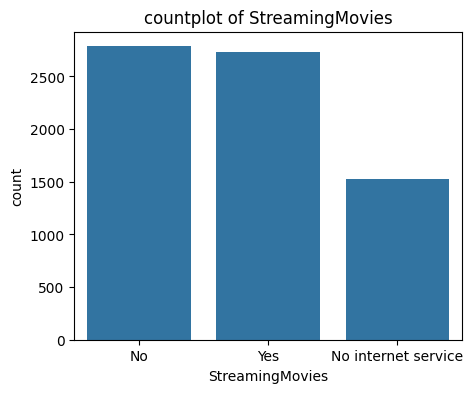

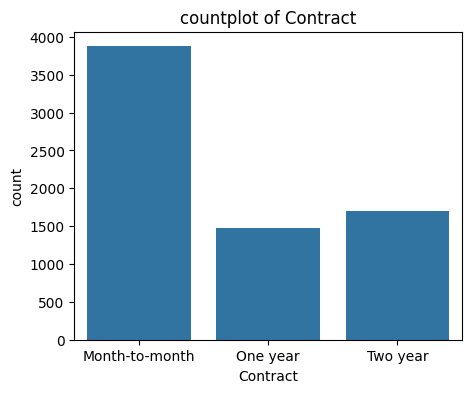

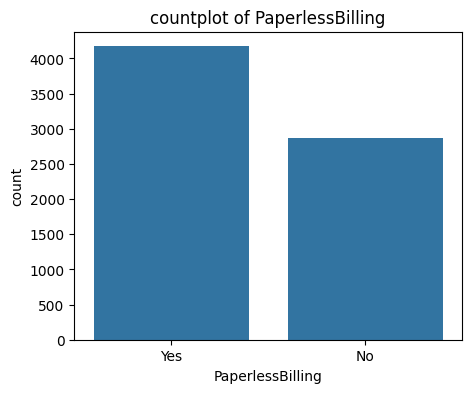

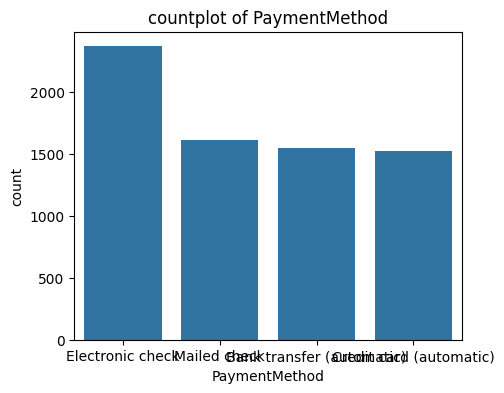

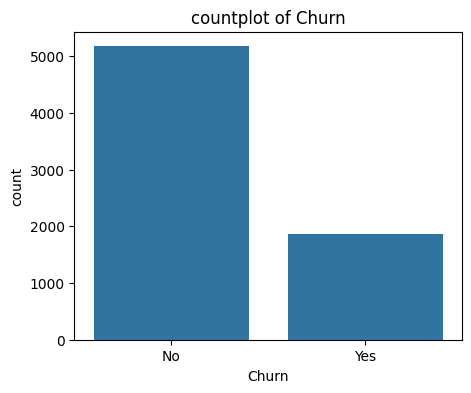

In [27]:
#categorical columns analysis

object_cols=df.select_dtypes(include='object').columns.to_list()
object_cols=['SeniorCitizen']+object_cols
for col in object_cols:
  plt.figure(figsize=(5,4))
  sns.countplot(x=df[col])
  plt.title(f"countplot of {col}")
  plt.show()

In [28]:
#Data preprocessing
#label encoding for churn (target column)
df['Churn']=df['Churn'].replace({"Yes":1,"No":0})

/tmp/ipython-input-2022456098.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({"Yes":1,"No":0})


In [29]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [30]:
object_columns=df.select_dtypes(include='object').columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [31]:
#initialize the dictionary to store the encoders
encoders={}

for columns in object_columns:
  label_encoder=LabelEncoder()
  df[columns]=label_encoder.fit_transform(df[columns])
  encoders[columns]=label_encoder

#save the encoder to the pickle file
with open('label_encoders.pkl','wb') as file:
  pickle.dump(encoders,file)

In [32]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [34]:
#splitting the features and the test data
x=df.drop(columns=['Churn'])
y=df['Churn']

In [35]:
#splitting the training and test data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
print(Y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [37]:
#using SMOTE to balance the target column(Churn)
smote=SMOTE(random_state=42)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [39]:
print(Y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [43]:
#trainig the model with default hyperparameters
#dictionary of models
models={
    'DecisionTree':DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42)
}


In [46]:
#dictionary to store the cross validation
cv_scores={}

#Perform 5 fold cross validation for each model
for model_name,model in models.items():
  print(f"trainig {model_name} with default hyperparametrs")
  scores=cross_val_score(model,X_train_smote,Y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross-validation accuracy :{np.mean(scores):.2f}")
  print("-"*70)

trainig DecisionTree with default hyperparametrs
DecisionTree cross-validation accuracy :0.78
----------------------------------------------------------------------
trainig RandomForest with default hyperparametrs
RandomForest cross-validation accuracy :0.84
----------------------------------------------------------------------
trainig XGBoost with default hyperparametrs
XGBoost cross-validation accuracy :0.83
----------------------------------------------------------------------


In [50]:
#Random forest gives the highest accuracy
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote,Y_train_smote)

RandomForestClassifier(random_state=42)

In [51]:
print(Y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [52]:
#evaluate on test data
y_test_pred=rfc.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test_pred,Y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test_pred,Y_test))
print("Classification Report:\n",classification_report(y_test_pred,Y_test))

Accuracy Score:
 0.7785663591199432
Confusion Matrix:
 [[878 154]
 [158 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1032
           1       0.59      0.58      0.58       377

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [56]:
#save the trained model as a pickle file
model_data={"model":rfc,"feature_names": x.columns.tolist()}
with open("customer_churn_model.pkl","wb") as file:
  pickle.dump(model_data,file)

In [57]:
#load the saved model and encoders
with open("customer_churn_model.pkl","rb") as file:
  model_data=pickle.load(file)

loaded_model=model_data["model"]
feature_names=model_data["feature_names"]

In [58]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [59]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [70]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}
input_datadf=pd.DataFrame([input_data])
with open('label_encoders.pkl','rb') as file:
  encoders=pickle.load(file)

  #encoe categorical features using the saved encoders
  for column,encoder in encoders.items():
    input_datadf[column]=encoder.transform(input_datadf[column])

#make predictions
predictions=loaded_model.predict(input_datadf)
pred_prob=loaded_model.predict_proba(input_datadf)
print(predictions)

#results
print(f"Predictions  {'churn' if predictions[0]==1 else 'churn'}")
print(f"Prediction probability:{pred_prob}")



[0]
Predictions  churn
Prediction probability:[[0.78 0.22]]


In [71]:
input_datadf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
